In [1]:
#1. Load the dataset into a pandas dataframe. Name the variable as "survey".
import pandas as pd
survey=pd.read_excel('Downloads/Sample Survey.xlsx',sheet_name='Data')
survey.head() 

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [2]:
#2. How many samples were collected on each day?
samples_collected_on_eachday=survey.groupby(['collection_date']).count()['response_id']
print('The number of samples collected on each day are as follows:')
samples_collected_on_eachday

The number of samples collected on each day are as follows:


collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
Name: response_id, dtype: int64

In [3]:
#3. What proportion of total respondents were aged less than 45? 
survey.dtypes

response_id                  int64
collection_date     datetime64[ns]
urban_rural                 object
education                   object
income                      object
Vote_Now                    object
Past_Vote                   object
CM_satisfaction             object
MLA_satisfaction            object
age                         object
gender                      object
assembly_no                  int64
category                    object
weight                     float64
dtype: object

In [4]:
survey['age'].unique()

array([26, 34, 25, 36, 22, 38, 23, 42, 51, 29, 24, 30, 39, 37, 19, 44, 53,
       32, 21, 18, 20, 27, 48, 28, 45, 74, 35, 31, 70, 40, 49, 46, 43, 41,
       33, 58, '24ko', 56, 50, 55, 54, 62, 60, 59, 47, 61, 52, 66, 57, 67,
       65, 71, 63, 64, 68, 69, 99, 72, 75, 76], dtype=object)

In [5]:
survey['age'].replace('24ko',24,inplace=True)

In [6]:
survey['age'].unique()

array([26, 34, 25, 36, 22, 38, 23, 42, 51, 29, 24, 30, 39, 37, 19, 44, 53,
       32, 21, 18, 20, 27, 48, 28, 45, 74, 35, 31, 70, 40, 49, 46, 43, 41,
       33, 58, 56, 50, 55, 54, 62, 60, 59, 47, 61, 52, 66, 57, 67, 65, 71,
       63, 64, 68, 69, 99, 72, 75, 76], dtype=int64)

In [7]:
age_filter=survey['age']<45
age_less_than_45=survey.loc[age_filter].count()['response_id']
total_number_of_respondents=survey['response_id'].count()
proportion_of_respondents_less_than_45_years = (age_less_than_45/total_number_of_respondents)
print('The proportion of respondents aged less than 45 are:') 
proportion_of_respondents_less_than_45_years

The proportion of respondents aged less than 45 are:


0.9318479685452162

In [8]:
#4. Create a new column named age_group
age_group=pd.cut(survey.age,bins=[18,25,40,55,100],labels=['18-25','25-40','40-55','55+'])
survey.insert(14,'age_group',age_group)
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,18-25
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,18-25
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,25-40
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926,18-25
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,18-25


In [9]:
#5. How many samples were collected for each age-group? Which age-group had the most samples?
print('Number of samples collected for each age-group:')
survey.groupby('age_group').count()['response_id']

Number of samples collected for each age-group:


age_group
18-25    2567
25-40    3423
40-55     644
55+       108
Name: response_id, dtype: int64

In [10]:
print('Age-group with the most number of samples: 25-40')
print('Number of samples:')
survey.groupby('age_group').count()['response_id'].max()

Age-group with the most number of samples: 25-40
Number of samples:


3423

In [11]:
#6. What proportion of people voted for RJD both in past and present?
rjd_voters=(survey['Vote_Now']=='RJD') & (survey['Past_Vote']=='RJD')
print('Number of people who voted for RJD in previous and current elections:')
survey.loc[rjd_voters]['response_id'].count()

Number of people who voted for RJD in previous and current elections:


811

In [12]:
#7. Proportion of CM Satisfaction status 
survey.groupby('collection_date')['CM_satisfaction'].value_counts()

collection_date  CM_satisfaction      
2020-08-24       Fully Dissatisfied       642
                 Somewhat Satisfied       503
                 Somewhat Dissatisfied    147
                 Fully Satisfied          146
                 Can’t say                 41
2020-08-25       Fully Dissatisfied       433
                 Somewhat Satisfied       346
                 Fully Satisfied           95
                 Somewhat Dissatisfied     90
                 Can’t say                 34
2020-08-26       Fully Dissatisfied       258
                 Somewhat Satisfied       208
                 Fully Satisfied           59
                 Somewhat Dissatisfied     51
                 Can’t say                 22
2020-08-27       Fully Dissatisfied       294
                 Somewhat Satisfied       215
                 Somewhat Dissatisfied     79
                 Fully Satisfied           54
                 Can’t say                 23
2020-08-28       Fully Dissatisfied      

In [13]:
cms=survey['CM_satisfaction']=='Fully Satisfied'
cm_satis=survey.loc[cms]['collection_date'].value_counts()

In [14]:
total_votes=survey.groupby(['collection_date']).count()['response_id']

In [15]:
Dataframe = pd.concat([cm_satis,total_votes],axis='columns',sort=False)
Dataframe

,collection_date,response_id
2020-08-24,146,1479
2020-08-25,95,998
2020-08-26,59,598
2020-08-27,54,665
2020-08-28,92,761
2020-08-29,73,620
2020-08-30,65,582
2020-08-31,62,557
2020-09-01,75,607


In [16]:
proportion_satisfaction=(Dataframe['collection_date']/Dataframe['response_id'])
print('Proportion of people satisfied with their CM are:')
proportion_satisfaction

Proportion of people satisfied with their CM are:


2020-08-24    0.098715
2020-08-25    0.095190
2020-08-26    0.098662
2020-08-27    0.081203
2020-08-28    0.120894
2020-08-29    0.117742
2020-08-30    0.111684
2020-08-31    0.111311
2020-09-01    0.123558
Freq: D, dtype: float64

In [17]:
#8. Proportion of MLA dissatisfaction 
survey.groupby('collection_date')['MLA_satisfaction'].value_counts()

collection_date  MLA_satisfaction     
2020-08-24       Fully Dissatisfied       887
                 Somewhat Satisfied       246
                 Fully Satisfied          150
                 Somewhat Dissatisfied    121
                 Can’t say                 75
2020-08-25       Fully Dissatisfied       630
                 Somewhat Satisfied       180
                 Fully Satisfied           72
                 Somewhat Dissatisfied     70
                 Can’t say                 46
2020-08-26       Fully Dissatisfied       353
                 Somewhat Satisfied       107
                 Fully Satisfied           62
                 Somewhat Dissatisfied     42
                 Can’t say                 34
2020-08-27       Fully Dissatisfied       403
                 Somewhat Satisfied       107
                 Fully Satisfied           61
                 Somewhat Dissatisfied     57
                 Can’t say                 37
2020-08-28       Fully Dissatisfied      

In [18]:
mls=survey['MLA_satisfaction']=='Fully Dissatisfied'
mla_satis=survey.loc[mls]['collection_date'].value_counts()

In [19]:
total_votes=survey.groupby(['collection_date']).count()['response_id']

In [20]:
Dataframe2 = pd.concat([mla_satis,total_votes],axis='columns',sort=False)
Dataframe2

,collection_date,response_id
2020-08-24,887,1479
2020-08-25,630,998
2020-08-26,353,598
2020-08-27,403,665
2020-08-28,462,761
2020-08-29,350,620
2020-08-30,361,582
2020-08-31,321,557
2020-09-01,385,607


In [21]:
proportion_dissatisfaction=(Dataframe2['collection_date']/Dataframe2['response_id'])
print('Proportion of people dissatisfied with their MLA are:')
proportion_dissatisfaction

Proportion of people dissatisfied with their MLA are:


2020-08-24    0.599730
2020-08-25    0.631263
2020-08-26    0.590301
2020-08-27    0.606015
2020-08-28    0.607096
2020-08-29    0.564516
2020-08-30    0.620275
2020-08-31    0.576302
2020-09-01    0.634267
Freq: D, dtype: float64

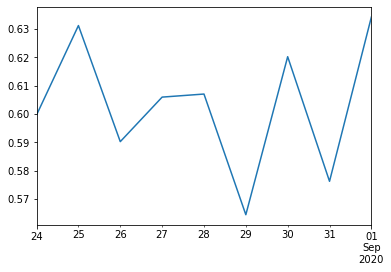

In [22]:
%matplotlib inline
proportion_dissatisfaction.plot()

In [23]:
#9. Create a pivot table with with index as Past_Vote, column as Vote_Now and cell values as the count of samples
pd.set_option('display.max_columns',234)
survey.pivot_table(index='Past_Vote',columns='Vote_Now',aggfunc='count') 

CM_satisfaction                                              \
Vote_Now                 AAP AIMIM     BJP  BSP  HAM   INC JAP(L)  JD(U)   
Past_Vote                                                                  
BJP                      7.0   1.0  1630.0  3.0  5.0  42.0  101.0  110.0   
BSP                      NaN   1.0     2.0  5.0  NaN   1.0    NaN    NaN   
Did not vote             8.0   5.0   231.0  2.0  1.0  22.0   41.0   69.0   
HAM                      2.0   NaN    25.0  NaN  1.0   NaN    3.0    2.0   
INC                      NaN   6.0     6.0  NaN  NaN  57.0   10.0    9.0   
JAP(L)                   NaN   NaN     4.0  NaN  NaN   NaN   35.0    NaN   
JD(U)                    6.0  10.0   254.0  2.0  2.0  45.0   72.0  279.0   
LJP                      NaN   NaN    76.0  1.0  NaN   4.0    3.0    6.0   
Left Front               NaN   1.0     2.0  NaN  NaN   1.0    NaN    NaN   
NOTA                     NaN   1.0    29.0  1.0  NaN   9.0    7.0    7.0   
Others                   1.0   5.0    45.0  1.0  1.0   4.0    7.0    4.0   
RJD                      3.0   7.0    46.0  NaN  1.0  31.0   31.0   39.0   
RLSP                     NaN   NaN    17.0  NaN  NaN   NaN    3.0    NaN   
VIP                      NaN   NaN     NaN  NaN  NaN   NaN    NaN    1.0   

                                                                        \
Vote_Now       LJP Left Front   NOTA Others Plurals    RJD  RJJP  RLSP   
Past_Vote                                                                
BJP           44.0       13.0  194.0   32.0    87.0  370.0  88.0  24.0   
BSP            NaN        NaN    NaN    NaN     NaN    NaN   NaN   NaN   
Did not vote  10.0       16.0   83.0   11.0    51.0  195.0  20.0   3.0   
HAM            2.0        NaN    4.0    NaN     NaN    6.0   4.0   NaN   
INC            NaN        3.0    6.0    3.0     3.0  100.0   1.0   2.0   
JAP(L)         NaN        NaN    NaN    1.0     NaN    2.0   NaN   NaN   
JD(U)         29.0        9.0   90.0   18.0    43.0  435.0  13.0  25.0   
LJP            9.0        2.0    3.0    NaN     2.0   17.0   1.0   NaN   
Left Front     NaN       18.0    1.0    1.0     NaN    4.0   NaN   1.0   
NOTA           3.0        5.0   46.0    7.0    11.0   27.0   5.0   4.0   
Others         1.0        4.0   10.0    6.0     8.0   21.0   7.0   1.0   
RJD            4.0        9.0   18.0    8.0    10.0  811.0   1.0  10.0   
RLSP           NaN        NaN    3.0    NaN     2.0    8.0   2.0  12.0   
VIP            NaN        NaN    NaN    NaN     NaN    NaN   NaN   NaN   

                             MLA_satisfaction                                \
Vote_Now     Undecided   VIP              AAP AIMIM     BJP  BSP  HAM   INC   
Past_Vote                                                                     
BJP               62.0  10.0              7.0   1.0  1630.0  3.0  5.0  42.0   
BSP                NaN   NaN              NaN   1.0     2.0  5.0  NaN   1.0   
Did not vote      31.0   5.0              8.0   5.0   231.0  2.0  1.0  22.0   
HAM                1.0   NaN              2.0   NaN    25.0  NaN  1.0   NaN   
INC                7.0   NaN              NaN   6.0     6.0  NaN  NaN  57.0   
JAP(L)             NaN   NaN              NaN   NaN     4.0  NaN  NaN   NaN   
JD(U)             36.0   6.0              6.0  10.0   254.0  2.0  2.0  45.0   
LJP                1.0   NaN              NaN   NaN    76.0  1.0  NaN   4.0   
Left Front         NaN   1.0              NaN   1.0     2.0  NaN  NaN   1.0   
NOTA               5.0   NaN              NaN   1.0    29.0  1.0  NaN   9.0   
Others             6.0   NaN              1.0   5.0    45.0  1.0  1.0   4.0   
RJD               14.0   4.0              3.0   7.0    46.0  NaN  1.0  31.0   
RLSP               1.0   1.0              NaN   NaN    17.0  NaN  NaN   NaN   
VIP                NaN   1.0              NaN   NaN     NaN  NaN  NaN   NaN   

                                                                          \
Vote_Now     JAP(L)  JD(U)   LJP Left Fro

In [24]:
#10. Create a pivot table with with index as Past_Vote, column as Vote_Now and cell values as the sum of weights.
survey.pivot_table(index='Past_Vote',columns='Vote_Now',aggfunc='sum')

age                                                        \
Vote_Now        AAP  AIMIM      BJP    BSP    HAM     INC  JAP(L)   JD(U)   
Past_Vote                                                                   
BJP           174.0   24.0  52344.0   89.0  166.0  1312.0  2885.0  3481.0   
BSP             NaN   27.0     46.0  121.0    NaN    20.0     NaN     NaN   
Did not vote  211.0  122.0   5443.0   46.0   21.0   565.0   969.0  1691.0   
HAM            48.0    NaN    896.0    NaN   36.0     NaN    89.0    65.0   
INC             NaN  157.0    159.0    NaN    NaN  1863.0   287.0   317.0   
JAP(L)          NaN    NaN    119.0    NaN    NaN     NaN   924.0     NaN   
JD(U)         195.0  274.0   7920.0   75.0   44.0  1372.0  2046.0  8419.0   
LJP             NaN    NaN   2562.0   23.0    NaN   138.0    85.0   161.0   
Left Front      NaN   22.0     71.0    NaN    NaN    26.0     NaN     NaN   
NOTA            NaN   24.0    776.0   20.0    NaN   261.0   194.0   211.0   
Others         26.0  152.0   1408.0   34.0   27.0   144.0   193.0    84.0   
RJD            90.0  245.0   1422.0    NaN   25.0  1043.0   877.0  1187.0   
RLSP            NaN    NaN    577.0    NaN    NaN     NaN    81.0     NaN   
VIP             NaN    NaN      NaN    NaN    NaN     NaN     NaN    18.0   

                                                                          \
Vote_Now         LJP Left Front    NOTA  Others Plurals      RJD    RJJP   
Past_Vote                                                                  
BJP           1247.0      394.0  6091.0  1027.0  2435.0  11328.0  2381.0   
BSP              NaN        NaN     NaN     NaN     NaN      NaN     NaN   
Did not vote   262.0      351.0  2026.0   254.0  1129.0   4410.0   465.0   
HAM             86.0        NaN   145.0     NaN     NaN    197.0   141.0   
INC              NaN       93.0   163.0   101.0    82.0   3142.0    50.0   
JAP(L)           NaN        NaN     NaN    23.0     NaN     49.0     NaN   
JD(U)          833.0      264.0  2630.0   584.0  1148.0  13247.0   371.0   
LJP            259.0       46.0    83.0     NaN    62.0    521.0    22.0   
Left Front       NaN      583.0    23.0    24.0     NaN    117.0     NaN   
NOTA            71.0      138.0  1344.0   150.0   292.0    729.0   120.0   
Others          23.0       94.0   268.0   178.0   212.0    563.0   180.0   
RJD            133.0      325.0   506.0   229.0   233.0  22815.0    21.0   
RLSP             NaN        NaN   120.0     NaN    77.0    253.0    80.0   
VIP              NaN        NaN     NaN     NaN     NaN      NaN     NaN   

                                     assembly_no                          \
Vote_Now       RLSP Undecided    VIP         AAP  AIMIM       BJP    BSP   
Past_Vote                                                                  
BJP           688.0    2059.0  252.0       885.0   63.0  210969.0  324.0   
BSP             NaN       NaN    NaN         NaN   43.0     129.0  681.0   
Did not vote   77.0     742.0  100.0      1097.0  585.0   30800.0  408.0   
HAM             NaN      25.0    NaN       436.0    NaN    3888.0    NaN   
INC            70.0     216.0    NaN         NaN  786.0     609.0    NaN   
JAP(L)          NaN       NaN    NaN         NaN    NaN     393.0    NaN   
JD(U)         763.0    1134.0  187.0       630.0  913.0   32044.0  248.0   
LJP             NaN      27.0    NaN         NaN    NaN   10879.0  130.0   
Left Front     30.0       NaN   28.0         NaN   48.0     178.0    NaN   
NOTA          135.0     117.0    NaN         NaN  124.0    3948.0  118.0   
Others         26.0     168.0    NaN       184.0  429.0    5988.0  221.0   
RJD           351.0     445.0  130.0       505.0  509.0    5803.0    NaN   
RLSP          375.0      45.0   47.0         NaN    NaN    1978.0    NaN   
VIP             NaN       NaN   25.0         NaN    NaN       NaN    NaN   

                                                                           \
Vote_Now        HAM     INC   JAP(L)    JD(

In [25]:
#11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group
total_samples_agegroup=survey.groupby('age_group').count()['response_id']
dataframe1=pd.DataFrame(total_samples_agegroup) 
print('The required dataframe is:')
dataframe1

The required dataframe is:


,response_id
age_group,
18-25,2567
25-40,3423
40-55,644
55+,108


In [26]:
#12. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group who voted for JD(U) in Vote_Now
voted_jdu=survey['Vote_Now']=='JD(U)'
voted_for_jdu=survey.loc[voted_jdu]['age_group'].value_counts()

In [27]:
Dataframe3 = pd.concat([voted_for_jdu],axis='columns',sort=False)
Dataframe3

,age_group
25-40,245
18-25,199
40-55,55
55+,10


In [28]:
#13. Merge the above dataframes
final=pd.concat([dataframe1,Dataframe3],axis='columns',sort=False)

In [29]:
final.rename(columns={'response_id':'age_group_count','age_group':'voted_for_jdu'},inplace=True)

In [30]:
final

,age_group_count,voted_for_jdu
18-25,2567,199
25-40,3423,245
40-55,644,55
55+,108,10
